DPsim
--------------------

As a first simple, test we will simulate a small static network. The network consists of 4 nodes and 4 elements:

| Component | Type            | Python Class                              | Node A | Node B | Paramter |
| :---------| :----           | :---------------------------------------- | :----- | :----- | :------- |
| cs       | Current Source  | `dpsimpy.emt.ph1.CurrentSource`       | 1      | 2    |          |
| rload    | Load Resistance | `dpsimpy.emt.ph1.Resistor`            | 2      | GND      | 10 Ohm       |

In [1]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
import math
import dpsimpy

In [2]:
# DPsim DP simulation
name = 'VILLAS_test'

# Nodes
gnd = dpsimpy.dp.SimNode.gnd
n1 =  dpsimpy.dp.SimNode('n1')

# Components
rload = dpsimpy.dp.ph1.Resistor('rload')
rload.set_parameters(R=10)
cs = dpsimpy.dp.ph1.CurrentSource('cs')
cs.set_parameters(I_ref=complex(500, 0) * math.sqrt(2))

cs.connect([gnd, n1])
rload.connect([n1, gnd])

system = dpsimpy.SystemTopology(50, [gnd, n1], [rload, cs])

logger = dpsimpy.Logger(name)

In [3]:
name = 'VILLAS_test'

dpsimpy.Logger.set_log_dir("logs/" + name)

logger = dpsimpy.Logger(name)

for i in range(1, len(system.nodes)):
    logger.log_attribute("n" + str(i) + ".v", "v", system.nodes[i])
    
logger.log_attribute('rload.i_intf', 'i_intf', rload);

sim = dpsimpy.Simulation(name)
sim.set_domain(dpsimpy.Domain.DP)
sim.set_system(system)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)
sim.add_logger(logger)

sim.run()

[21:57:44.624109 MnaSolverFactory info] creating KLUAdapter solver implementation


In [4]:
# read DPsim DP results
work_dir = "logs/" + name + "/"
log_name = 'VILLAS_test'
print(work_dir + log_name + '.csv')
ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/VILLAS_test/VILLAS_test.csv
column number: 2
results length: 1001
real column names: []
complex column names: ['n1.v', 'rload.i_intf']


In [5]:
# convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

# 3Ph, RMS to 1Ph 
for name, ts in ts_dpsim_dp_emt.items():
    ts.values = ts.values * math.sqrt(2)/2

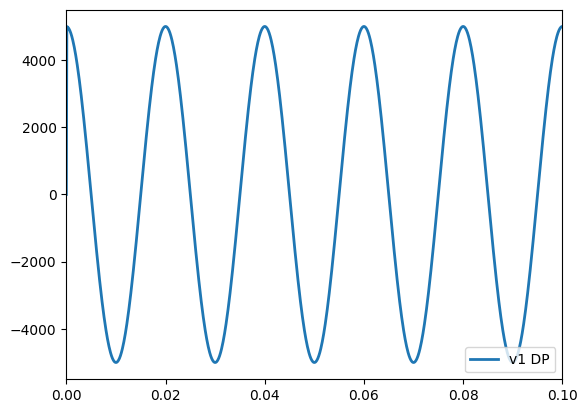

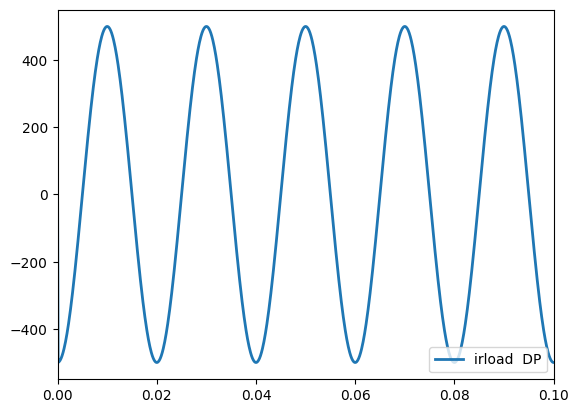

In [6]:
pt.set_timeseries_labels(ts_dpsim_dp_emt['n1.v_shift'], 'v1 DP')
pt.set_timeseries_labels(ts_dpsim_dp_emt['rload.i_intf_shift'], 'irload  DP')
pt.plot_timeseries(1, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['rload.i_intf_shift'])